<p> use the functions genarate_normal_data, genarate_lognormal_data to get the two 1-d data sets. </p>
<p> ex: <i>normaldata = genarate_normal_data()</i>, <i>logdata = genarate_lognormal_data()</i> </p>
<p>Q1.
<ol>
<li>Plot the Q-Q plot between the normaldata (N) and logdata (L)</li>
<li> Find the covariance between N and L vectors
    <ul>
    <li>try to plot datpoints (N(i),L(i)) try to get the relation</li>
    <li>use inbuilt functions to get this value</li>
    </ul>
 </li>
<li> Do 1, 2 for Normalized vectors of N and L</li>
<li> Do 1, 2 for Standardized vectors of N and L</li>
</ol>
</p>
<p>Q2.
1. Prove that the E[(X-μ)^2] = σ^2
2. Prove that the Expectation of a randam varaible X~N(μ,σ) is equal to μ
</p>

In [4]:
import numpy as np
def generate_normal_data():
    return np.random.randn(1000)

In [5]:
def generate_lognormal_data():
    return np.random.lognormal(0,1,1000)

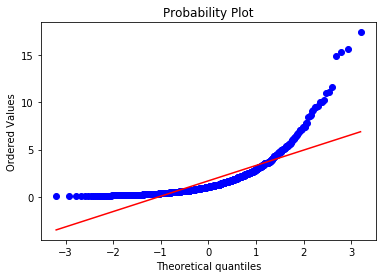

In [6]:
import numpy as np 
import pylab 
import scipy.stats as stats

normal=generate_normal_data()
lognormal=generate_lognormal_data()
stats.probplot(lognormal, dist="norm", plot=pylab)
pylab.show()

In [7]:
#Covariance between normal and lognormal data
np.cov(normal,lognormal)[0][1]

-0.051193858583805769

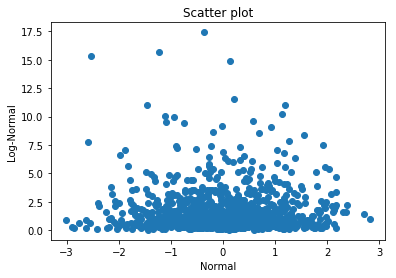

In [8]:
import matplotlib.pyplot as plt

plt.scatter(normal,lognormal)
plt.title('Scatter plot')
plt.xlabel('Normal')
plt.ylabel('Log-Normal')
plt.show()

Covariance between normalized normal and normalized lognormal data: -0.000506106417092


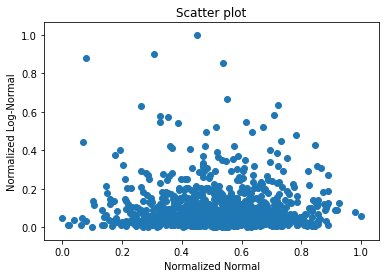

In [11]:
#Normalization

normalized_normal=[]
min_list=min(normal)
max_list=max(normal)
r=max_list-min_list
for d in normal:
    normalized_normal.append((d-min_list)/r)
    
normalized_lognormal=[]
min_list=min(lognormal)
max_list=max(lognormal)
r=max_list-min_list
for d in lognormal:
    normalized_lognormal.append((d-min_list)/r)
    
print "Covariance between normalized normal and normalized lognormal data: "+str(np.cov(normalized_normal,normalized_lognormal)[0][1])

plt.scatter(normalized_normal,normalized_lognormal)
plt.title('Scatter plot')
plt.xlabel('Normalized Normal')
plt.ylabel('Normalized Log-Normal')
plt.show()

Covariance between standardized normal and standardized lognormal data: -0.0266026269459


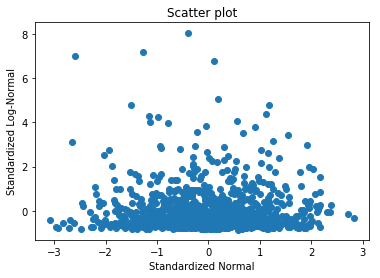

In [12]:
#Standardization

standardized_normal=[]
mean=np.mean(normal)
std=np.std(normal)
for d in normal:
    standardized_normal.append(((d-mean)/std))
    
standardized_lognormal=[]
m=np.mean(lognormal)
s=np.std(lognormal)
for d in lognormal:
    standardized_lognormal.append(((d-m)/s))

print "Covariance between standardized normal and standardized lognormal data: "+str(np.cov(standardized_normal,standardized_lognormal)[0][1])

plt.scatter(standardized_normal,standardized_lognormal)
plt.title('Scatter plot')
plt.xlabel('Standardized Normal')
plt.ylabel('Standardized Log-Normal')
plt.show()   

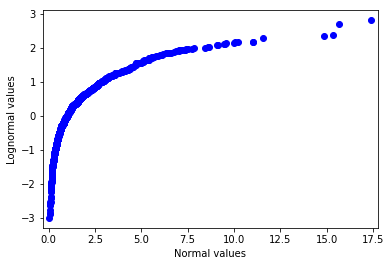

In [13]:
import statsmodels.graphics.gofplots as st

st.qqplot_2samples(normal,lognormal,"Normal values","Lognormal values")

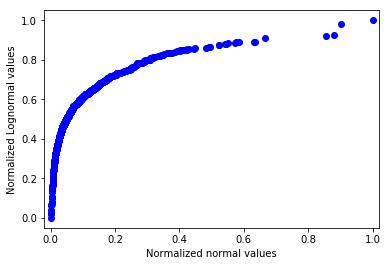

In [14]:
ppnn=st.ProbPlot(np.array(normalized_normal))
ppln=st.ProbPlot(np.array(normalized_lognormal))
st.qqplot_2samples(ppnn,ppln,"Normalized normal values","Normalized Lognormal values")

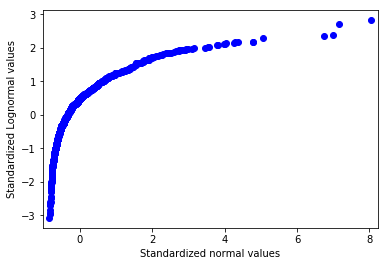

In [15]:
ppsn=st.ProbPlot(np.array(standardized_normal))
ppsln=st.ProbPlot(np.array(standardized_lognormal))
st.qqplot_2samples(ppsn,ppsln,"Standardized normal values","Standardized Lognormal values")

To Prove:

$E((X\ -\ \mu)^2) =\ \sigma^2 $

Proof:

$LHS=$

$E((x -\ \mu)^2) =\ E(x^2 +\ \mu^2 -\ 2x\mu) =\ E(x^2) +\ E(\mu^2) -\ 2\mu E(x)$

Now, $E(c)=c, E(x)=\mu$

So,
$E((x\ -\ \mu)^2) =\ E(x^2) +\ \mu^2 -\ 2\mu^2 =\ E(x^2) -\ \mu^2$

$RHS=$

$\sigma^2 = \frac{\sum_{i=1}^n {(x_i -\ \mu)}^2}{n}$
         $= \frac{\sum_{i=1}^n {(x_i^2 +\ \mu^2 -\ 2 \mu x_i)}}{n}$
         $= \frac{{\sum_{i=1}^n x_i^2 +\ \sum_{i=1}^n \mu^2 -\ \sum_{i=1}^n2 \mu x_i)}}{n}$
         $= \frac{\sum_{i=1}^n x_i^2}{n} +\ \frac{ \mu^2 \sum_{i=1}^n(1) - 2 \mu \sum_{i=1}^n x_i)}{n}$
         $= E(x^2) +\ \mu^2 - 2 \mu^2 = E(x^2) -\ \mu^2$  
         
$$LHS=RHS$$
Hence Proved!